In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.optimize import minimize
sns.set()

# Download Dataset

In [7]:
tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
etf = yf.Tickers(tickers)
data = etf.history(start='2010-01-01', actions = False)
data.drop(['Open','High','Low','Volume'],inplace=True, axis=1)
data = data.droplevel(0,axis=1).resample('m').last()
data

[*********************100%***********************]  9 of 9 completed
/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_81643/3754661904.py:5: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.droplevel(0,axis=1).resample('m').last()


Ticker,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,
2010-01-31 00:00:00+00:00,22.024281,33.847126,8.866618,20.734491,17.080414,17.734253,17.754028,24.451860,24.071121
2010-02-28 00:00:00+00:00,23.018074,34.865658,9.179267,21.840124,17.675306,18.296064,17.519547,24.545670,25.411646
2010-03-31 00:00:00+00:00,24.840231,35.847771,9.996117,23.738676,18.884253,18.985350,17.990929,25.200403,27.395498
2010-04-30 00:00:00+00:00,24.891491,37.337276,10.127728,24.749315,19.121325,18.781427,18.464058,24.219988,29.047239
2010-05-31 00:00:00+00:00,22.518778,33.061970,9.200188,22.492477,17.690699,17.911346,17.445019,22.643492,27.003420
...,...,...,...,...,...,...,...,...,...
2024-05-31 00:00:00+00:00,91.096039,92.457512,41.475777,123.087158,209.791962,76.760468,72.138367,143.139130,175.592255
2024-06-30 00:00:00+00:00,88.309998,91.150002,41.110001,121.870003,226.229996,76.580002,68.139999,145.750000,182.399994
2024-07-31 00:00:00+00:00,92.139999,93.209999,43.740002,127.860001,218.800003,77.849998,72.790001,149.630005,187.490005


In [8]:
rets = data.pct_change().fillna(0)
rets

Ticker,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,
2010-01-31 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-02-28 00:00:00+00:00,0.045123,0.030092,0.035261,0.053323,0.034829,0.031679,-0.013207,0.003836,0.055690
2010-03-31 00:00:00+00:00,0.079162,0.028168,0.088989,0.086930,0.068397,0.037674,0.026906,0.026674,0.078069
2010-04-30 00:00:00+00:00,0.002064,0.041551,0.013166,0.042574,0.012554,-0.010741,0.026298,-0.038905,0.060292
2010-05-31 00:00:00+00:00,-0.095322,-0.114505,-0.091584,-0.091188,-0.074818,-0.046327,-0.055190,-0.065091,-0.070362
...,...,...,...,...,...,...,...,...,...
2024-05-31 00:00:00+00:00,0.032720,-0.003422,0.031715,0.016376,0.070770,0.024371,0.089602,0.024015,0.001993
2024-06-30 00:00:00+00:00,-0.030584,-0.014142,-0.008819,-0.009889,0.078354,-0.002351,-0.055426,0.018240,0.038770
2024-07-31 00:00:00+00:00,0.043370,0.022600,0.063975,0.049151,-0.032843,0.016584,0.068242,0.026621,0.027906


In [9]:
pal = sns.color_palette('Spectral', len(tickers))
pal

[(0.8310649750096117, 0.23844675124951936, 0.30880430603613995),
 (0.9568627450980393, 0.42745098039215684, 0.2627450980392157),
 (0.9914648212226067, 0.677354863514033, 0.37808535178777386),
 (0.996078431372549, 0.8784313725490196, 0.5450980392156862),
 (0.998077662437524, 0.9992310649750096, 0.7460207612456747),
 (0.9019607843137256, 0.9607843137254902, 0.5960784313725491),
 (0.6652825836216842, 0.8645905420991927, 0.6432141484044599),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.19946174548250672, 0.5289504036908881, 0.7391003460207612)]

## Maximum Sharpe

In [11]:
rets.shape

(177, 9)

In [16]:
noa = rets.shape[1]
init_guess = np.repeat(1/noa,noa)
er = rets.mean()*12
cov = rets.cov()*12
# no shroting 
bounds = ((0.0, 1.0),)*noa
# constraint : Weight sum = 1, no leverage
weights_sum_to_1 = {'type':'eq',
                    'fun': lambda weights : np.sum(weights)-1}
#subject function : - shapre (no maximize function in scipy)
def neg_sharpe(weights, er, cov):
    r = weights.T @ er
    vol = np.sqrt(weights.T @ cov @ weights)
    return -r /vol

#optimization
res = minimize(neg_sharpe,
               init_guess,
               args=(er,cov),
               method='SLSQP',
               constraints=(weights_sum_to_1,),
               bounds=bounds)
print(res)
weights = res.x
print(weights)


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.1941797825137725
       x: [ 2.073e-16  9.500e-18  1.301e-16  5.702e-17  3.914e-01
            3.702e-02  2.687e-01  3.029e-01  1.027e-16]
     nit: 6
     jac: [ 4.879e-01  4.847e-01  2.495e-01  2.678e-01 -4.831e-04
            4.823e-04 -2.884e-04  8.147e-04  1.782e-01]
    nfev: 61
    njev: 6
[2.07344480e-16 9.50010314e-18 1.30085455e-16 5.70242169e-17
 3.91358405e-01 3.70165802e-02 2.68704727e-01 3.02920287e-01
 1.02748900e-16]


Weight Pie Chart

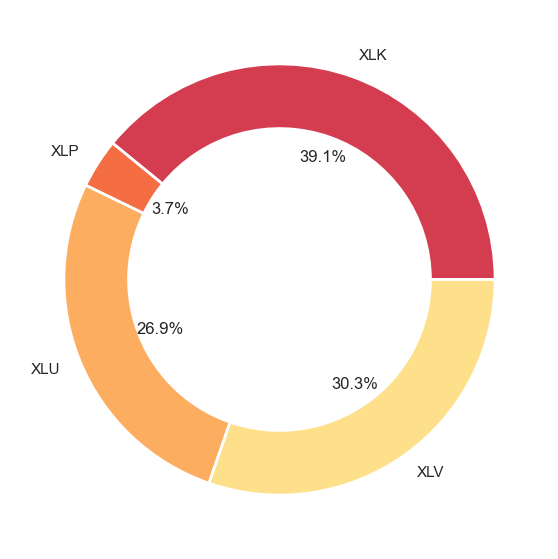

In [17]:
weights_df = pd.Series(np.round(weights, 3), index=tickers)
weights_df = weights_df[weights_df > 0.0]

plt.figure(figsize=(7, 7))
wedgeprops = {'width':0.3, 'edgecolor':'w', 'linewidth':2}
plt.pie(weights_df, labels=weights_df.index, autopct='%.1f%%', wedgeprops=wedgeprops, colors=pal)
plt.show()

In [18]:
# MSR model weight function
def get_msr_weights(er, cov):
    noa = er.shape[0]
    init_guess = np.repeat(1/noa, noa)
    bounds = ((0.0, 1.0), ) * noa
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1}
    def neg_sharpe(weights, er, cov):
        r = weights.T @ er
        vol = np.sqrt(weights.T @ cov @ weights)
        return - r / vol
    res = minimize(neg_sharpe,
                   init_guess,
                   args=(er, cov),
                   method='SLSQP',
                   constraints=(weights_sum_to_1,),
                   bounds=bounds)
    return res.x

In [35]:
# make a df that has same shape
msr_w_df = pd.DataFrame().reindex_like(rets)
# 매 시점마다의 expected return을 저장, 연간 기대수익율
er = np.array(rets * 12) # shape 은 (177,9) 177개월로 구성된 9개 자산의 대한 기대수익율
# 그시점에 그 수익율을 사용할 것이다.
# Cov (1 year)
cov = rets.rolling(12).cov().fillna(0) * 12
#print(cov.shape) # (1593, 9) ; 177*9... 원래는 9*9 짜리 행렬이 154개 (154,9,9) 3D is needed
cov = cov.values.reshape(int(cov.shape[0] / cov.shape[1]), cov.shape[1], cov.shape[1])
# 값들을 뽑아서 reshape
#print(cov.shape) # (177, 9, 9)

for i in range(12, len(msr_w_df)): # 앞에 12개는 사용 데이터 없음. 
    msr_w_df.iloc[i] = get_msr_weights(er[i-1], cov[i-1]) # 이전값만 알고 있으니, 당시 현재값은 모른다 그래서 -1

In [37]:
msr_w_df

Ticker,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,
2010-01-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-05-31 00:00:00+00:00,7.216450e-16,0.000000e+00,0.000000e+00,0.000000e+00,5.814793e-15,0.000000e+00,1.000000,6.245005e-15,9.575674e-16
2024-06-30 00:00:00+00:00,0.000000e+00,5.731877e-15,2.295888e-16,0.000000e+00,9.879865e-02,0.000000e+00,0.901201,5.793338e-15,0.000000e+00
2024-07-31 00:00:00+00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,1.654232e-14,3.250178e-14


Text(0, 0.5, 'Weights')

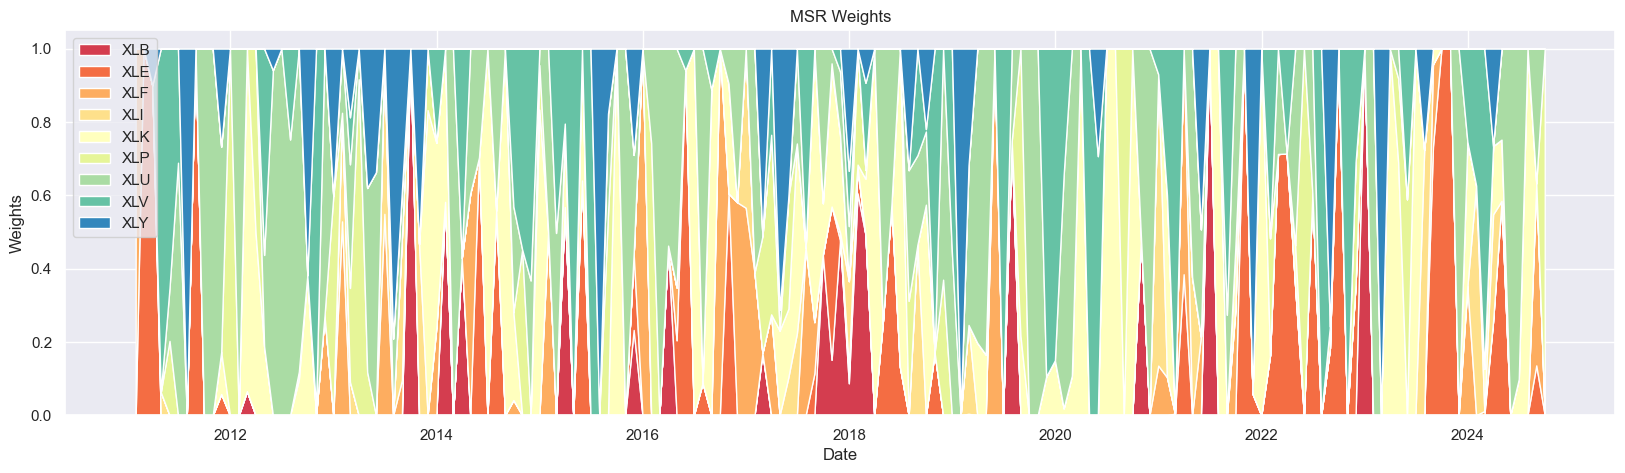

In [38]:
plt.figure(figsize=(20, 5))
plt.stackplot(msr_w_df.index, msr_w_df.T, labels=msr_w_df.columns, colors=pal)
plt.legend(loc='upper left')
plt.title('MSR Weights')
plt.xlabel('Date')
plt.ylabel('Weights')

Backtesting

Text(0, 0.5, 'Returns')

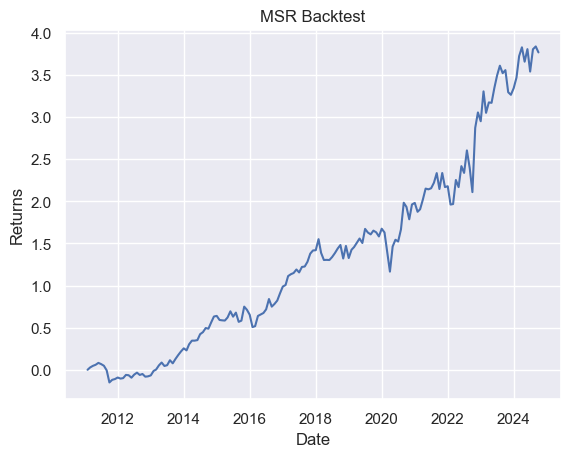

In [39]:
port_rets = msr_w_df.shift() * rets
port_cum_rets = (1 + port_rets.sum(axis=1)).cumprod() - 1

plt.plot(port_cum_rets.iloc[12:])
plt.title('MSR Backtest')
plt.xlabel('Date')
plt.ylabel('Returns')


## Insight:

- The MVO (Mean-Variance Optimization) model often leads to corner solutions, where the portfolio ends up heavily invested in just a few ETFs. This concentration is a significant limitation of the model.